<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_6/AST_Clase_6_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET : https://datos.gob.ar/series/api/series/?ids=11.3_VMATC_2004_M_12

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.8 MB/s 
     |████████████████████████████████| 9.8 MB 38.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 


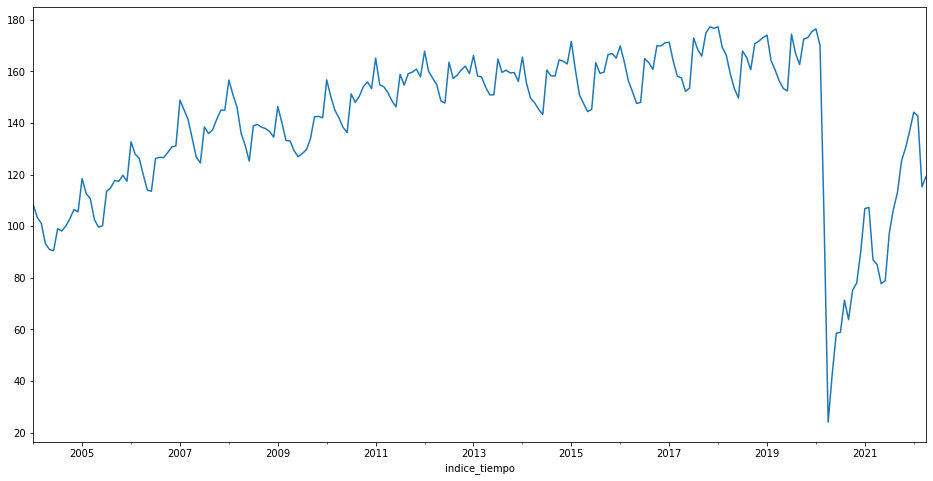

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/emae-apertura-por-sectores-valores-mensuales-indice-base-2004.csv'
serie_inicial = pd.read_csv(url) 

serie_inicial = pd.read_csv(url, index_col='indice_tiempo', parse_dates=True)

serie_inicial = serie_inicial.asfreq('MS') # Frecuencia mensual
serie_inicial.hoteles_restaurantes.plot(figsize=(16,8))

In [ ]:
serie_inicial = serie_inicial[serie_inicial.index<'2020-03-01']

In [ ]:
serie_inicial.tail()

,agricultura_ganaderia_caza_silvicultura,pesca,explotacion_minas_canteras,industria_manufacturera,electricidad_gas_agua,construccion,comercio_mayorista_minorista_reparaciones,hoteles_restaurantes,transporte_comunicaciones,intermediacion_financiera,actividades_inmobiliarias_empresariales_alquiler,admin_publica_planes_seguridad_social_afiliacion_obligatoria,ensenianza,servicios_sociales_salud,otras_actividades_servicios_comunitarias_sociales_personales,impuestos_netos_subsidios
indice_tiempo,,,,,,,,,,,,,,,,
2019-10-01,80.637039,220.803630,90.876299,129.678097,136.865075,135.889391,147.215548,172.538619,188.755532,167.623320,141.762115,156.859886,163.909447,173.063422,137.031682,159.847449
2019-11-01,90.998939,94.716952,86.667748,119.718279,136.732888,133.819288,142.896309,173.147303,185.712277,161.072027,140.149566,156.938282,164.120901,172.968720,135.560572,152.805965
2019-12-01,100.713753,95.738861,89.105092,114.127891,145.085143,122.014613,131.050677,175.417731,184.604127,168.627072,143.716410,157.569502,163.818176,166.545360,131.957302,149.104020
2020-01-01,67.018619,86.527388,87.990936,103.377001,151.977635,129.681352,123.384119,176.551272,185.042763,164.867986,136.542962,156.001635,157.816638,181.015771,153.262304,162.238738
2020-02-01,76.596422,165.886831,86.088322,102.787804,139.985100,125.151975,129.815811,170.177829,178.409168,156.630610,136.552077,156.314986,158.385118,172.146041,142.660339,145.833705


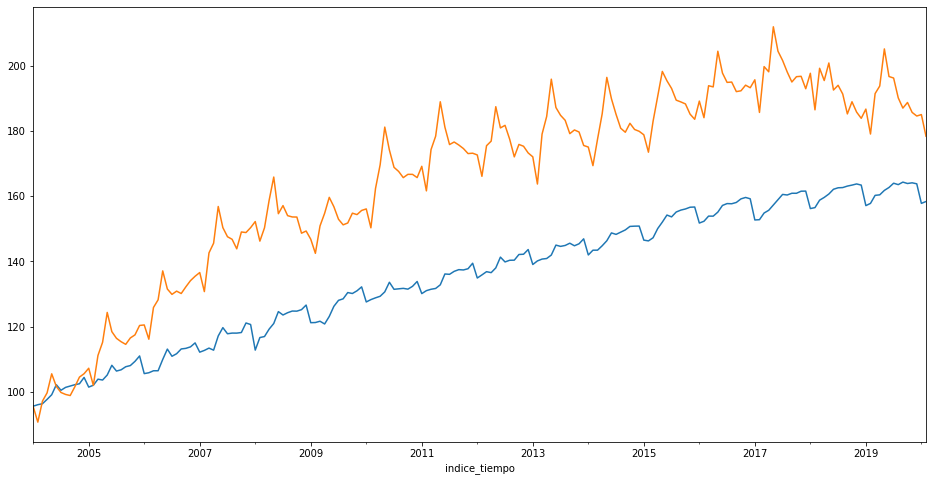

In [ ]:
serie_inicial.ensenianza.plot(figsize=(16,8));
serie_inicial.transporte_comunicaciones.plot(figsize=(16,8));

In [ ]:
plt.rcParams['figure.figsize']=[10,7.5]

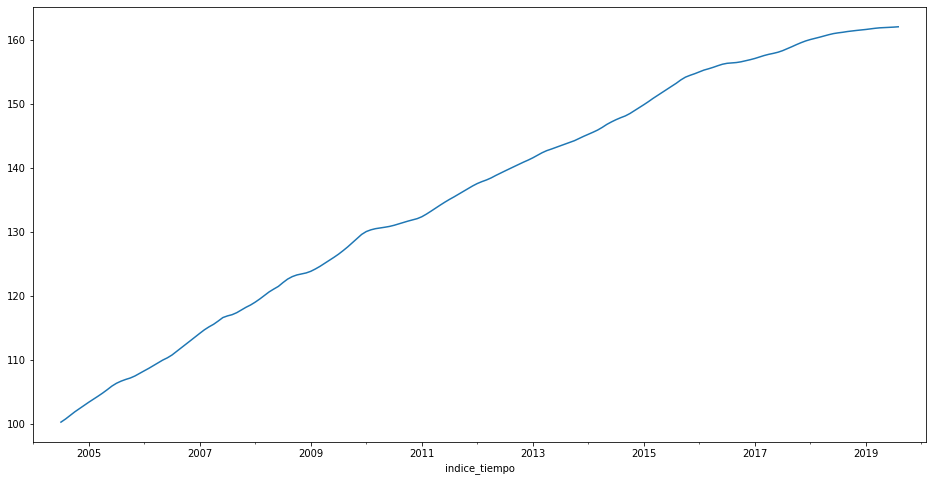

In [ ]:
# Descompnemos la serie
res = seasonal_decompose(serie_inicial.ensenianza, model='add');
#res.plot();
# Graficos individualizados = 
# res.seasonal.plot(figsize=(16,8))
res.trend.plot(figsize=(16,8))
# res.resid.plot(figsize=(16,8))

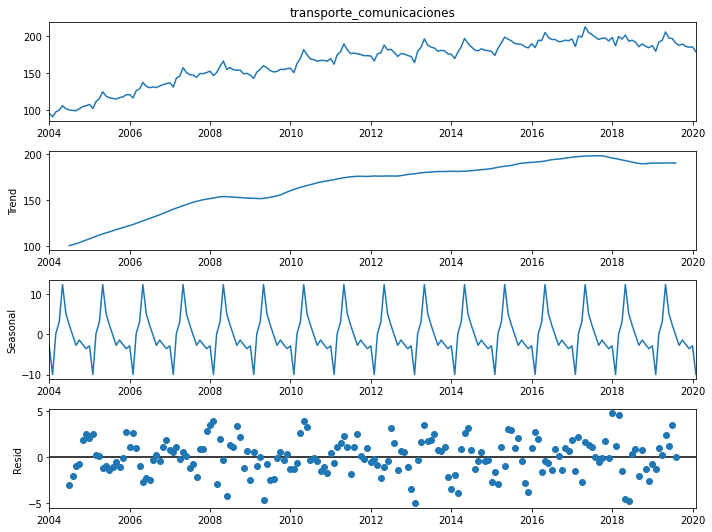

In [ ]:
# Descompnemos la serie
res = seasonal_decompose(serie_inicial.transporte_comunicaciones, model='add');
res.plot();

In [ ]:
serie_inicial.head()

,agricultura_ganaderia_caza_silvicultura,pesca,explotacion_minas_canteras,industria_manufacturera,electricidad_gas_agua,construccion,comercio_mayorista_minorista_reparaciones,hoteles_restaurantes,transporte_comunicaciones,intermediacion_financiera,actividades_inmobiliarias_empresariales_alquiler,admin_publica_planes_seguridad_social_afiliacion_obligatoria,ensenianza,servicios_sociales_salud,otras_actividades_servicios_comunitarias_sociales_personales,impuestos_netos_subsidios
indice_tiempo,,,,,,,,,,,,,,,,
2004-01-01,65.995350,42.547868,100.704499,91.454610,99.917983,95.938047,92.065338,108.411682,95.506726,103.890256,91.418382,97.261268,95.627695,94.198394,97.006178,98.314856
2004-02-01,64.926598,62.440771,95.414186,89.424852,92.893440,98.853388,91.464718,103.448256,90.736414,96.481464,94.046978,97.882285,96.084246,90.313462,96.836135,89.730000
2004-03-01,110.666559,174.084646,100.251038,101.426433,103.770210,103.124529,109.127780,101.061842,97.175809,98.304568,99.648725,97.718459,96.380304,98.081488,96.155043,99.139119
2004-04-01,150.065920,153.877638,96.697547,98.437312,97.009849,95.815492,99.420141,93.242999,99.706933,95.315896,97.602261,98.405542,97.711867,102.184345,98.083137,98.321770
2004-05-01,209.388076,132.357664,104.100533,100.353138,102.471825,97.994567,100.532744,90.985260,105.552437,97.004671,99.803493,99.208518,99.136888,102.761265,98.054349,103.825463


In [ ]:
len(serie_inicial) # 194
train_df = serie_inicial.iloc[:156] # 80% del dataset
test_df = serie_inicial.iloc[156:] # desde 156 hasta el final

In [ ]:
# prueba para ver los parametros de la funcion AUTOARIMA
# temp = auto_arima?

Cuando trabajamos con datos de periodicidad inferior al
año (trimestrales, mensuales, o diarios), suele darse el
factor estacional, y deberán analizarse las correlaciones
entre los mismos meses, trimestres, etc. de años
sucesivos.<br>
S- periodicidad 
<ol>
  <li>S=12 datos mensuales</li>
  <li>S=4 datos trimestrales</li>
  <li>S=3 datos cuatrimestrales</li>
  <li>S=7 datos diarios</li>
</ol>

In [ ]:
auto_arima(train_df['ensenianza'], m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=440.065, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=642.456, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=500.685, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=577.774, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=647.537, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=441.010, Time=4.99 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=441.467, Time=5.67 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=3.84 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=444.558, Time=3.20 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=439.700, Time=1.48 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=561.428, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -212.398
Date:                            Sat, 23 Jul 2022   AIC                            436.795
Time:                                    13:41:36   BIC                            455.056
Sample:                                         0   HQIC                           444.212
                                            - 156                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      1.066      0.287      -0.001       0.003
ar.L1          0.6982      0.073      9.567      0.000       0.555       0.841
ma.L1         -0.9477      0.041    -23.126      0.000      -1.028      -0.867
ar.S.L12       0.9899      0.010     97.930      0.000       0.970       1.010
ma.S.L12      -0.7614      0.104     -7.333      0.000      -0.965      -0.558
sigma2         0.7766      0.082      9.521      0.000       0.617       0.936
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                81.00
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod = SARIMAX(train_df['ensenianza'], order=(1,1,1), seasonal_order=(1,0,1,12))
res = mod.fit()
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         ensenianza   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -214.881
Date:                            Sat, 23 Jul 2022   AIC                            439.763
Time:                                    13:44:04   BIC                            454.980
Sample:                                01-01-2004   HQIC                           445.944
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6407      0.087      7.363      0.000       0.470       0.811
ma.L1         -0.8613      0.066   

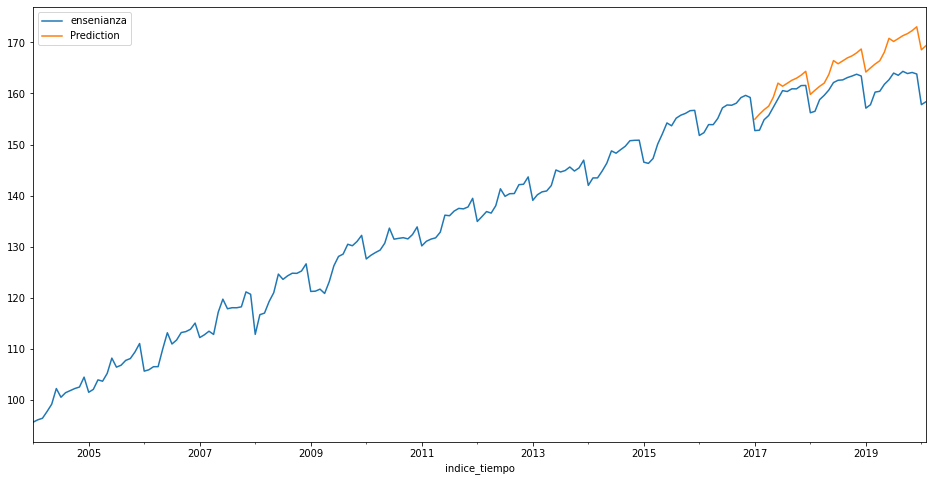

In [ ]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = res.predict(start, end).rename('Prediction')
ax = serie_inicial['ensenianza'].plot(legend=True, figsize=(16,8))
prediction.plot(legend=True)

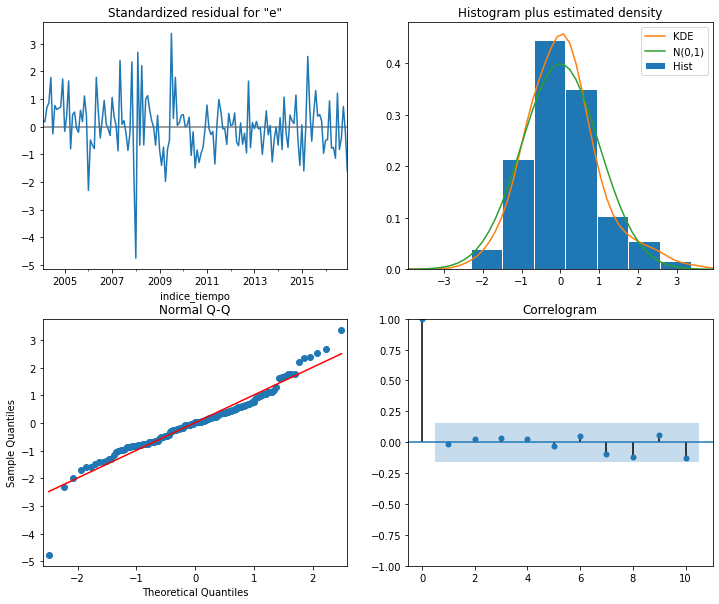

In [ ]:
# Diagnostico grafico los residuos del modelo
fig_res_modelo_opt = res.plot_diagnostics(figsize=(12,10))

In [ ]:
import statsmodels.api as sm

In [ ]:
train_df['resid'] = res.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(train_df.resid, lags=50)

In [ ]:
Incorr_residuos_modelo

,lb_stat,lb_pvalue
1,0.003679,0.951636
2,0.007036,0.996488
3,0.049122,0.997147
4,0.107054,0.998618
5,0.334830,0.996936
6,0.336933,0.999297
7,0.373151,0.999791
8,0.393332,0.999947
9,0.431536,0.999984
10,0.457143,0.999996


In [ ]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(test_df.ensenianza, prediction)
print('MAE: %f' % mae1)

MAE: 4.659337


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse1 = mean_squared_error(test_df.ensenianza, prediction)

rmse1 = sqrt(mse1)
print('RMSE: %f' % rmse1)

RMSE: 5.356464


In [ ]:
# Entrenamos ahora con la nueva variable "transporte"
auto_arima(train_df['ensenianza'], exogenous=train_df[['transporte_comunicaciones']], seasonal=True, 
          m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=438.282, Time=3.69 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=644.448, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=501.202, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=578.804, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=649.487, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=3.92 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=3.46 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.51 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=441.614, Time=1.24 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=451.025, Time=1.36 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.902
Date:                            Sat, 23 Jul 2022   AIC                            433.804
Time:                                    13:54:50   BIC                            455.108
Sample:                                01-01-2004   HQIC                           442.457
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                     0.0007      0.001      0.831      0.406      -0.001       0.002
transporte_comunicaciones     0.0775      0.027      2.849      0.004       0.024       0.131
ar.L1                         0.6726      0.072      9.282      0.000       0.531       0.815
ma.L1                        -0.9726      0.041    -23.953      0.000      -1.052      -0.893
ar.S.L12                      0.9937      0.008    124.826      0.000       0.978       1.009
ma.S.L12                     -0.7976      0.119     -6.687      0.000      -1.031      -0.564
sigma2                        0.7304      0.079      9.235      0.000       0.575       0.885
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                95.77
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.28
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

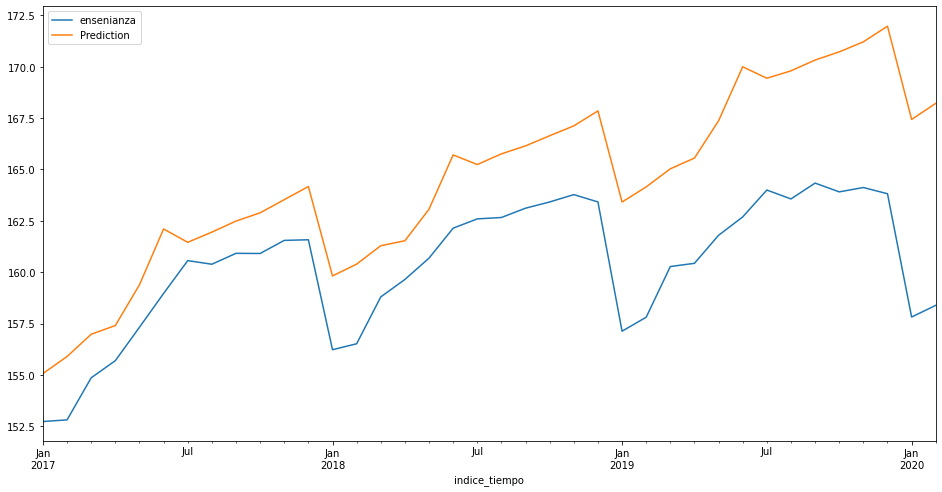

In [ ]:
# We can tell it to train and to distort the prediction using holiday data
mod_exog = SARIMAX(train_df['ensenianza'], exog=train_df[['transporte_comunicaciones']],
             order=(1,1,1), seasonal_order=(1,0,1,12))
res_exog = mod_exog.fit()
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction_exog = res_exog.predict(start, end, exog=test_df[['transporte_comunicaciones']]).rename('Prediction')

# As you can see from the plot that holiday has nothing to do with the price of oil
ax = test_df['ensenianza'].plot(legend=True, figsize=(16,8))
prediction_exog.plot(legend=True)

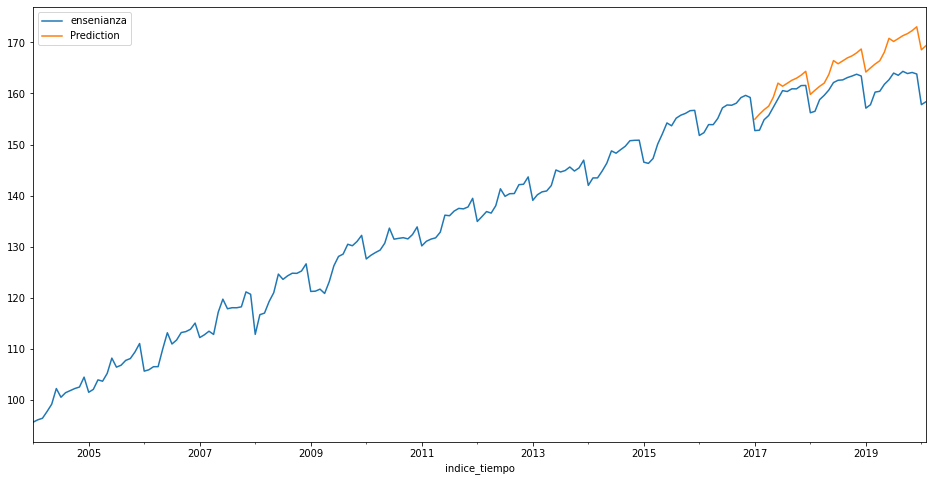

In [ ]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction_exog1 = res.predict(start, end).rename('Prediction')
ax = serie_inicial['ensenianza'].plot(legend=True, figsize=(16,8))
prediction_exog1.plot(legend=True)

In [ ]:
print(res_exog.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         ensenianza   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -213.703
Date:                            Sat, 23 Jul 2022   AIC                            439.406
Time:                                    14:00:03   BIC                            457.666
Sample:                                01-01-2004   HQIC                           446.823
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
transporte_comunicaciones     0.0466      0.033      1.428      0.153      -0.017   

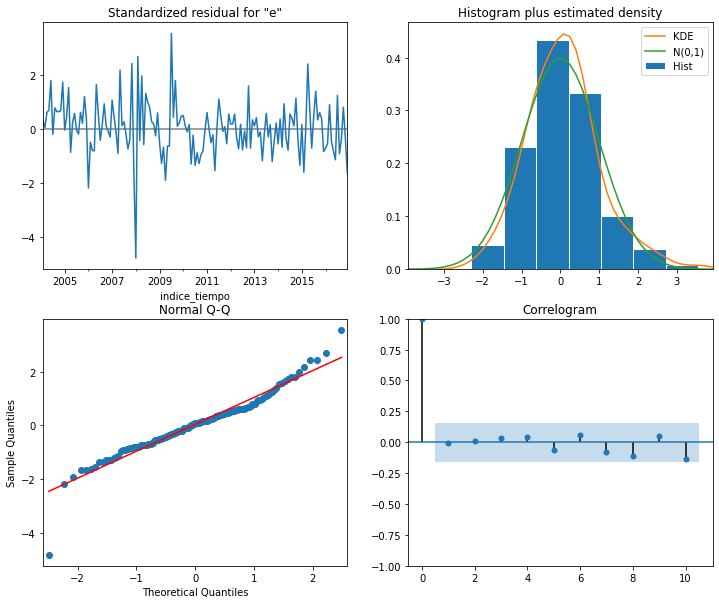

In [ ]:
# Diagnostico grafico los residuos del modelo
fig_res_exog = res_exog.plot_diagnostics(figsize=(12,10))

In [ ]:
import statsmodels.api as sm

In [ ]:
train_df['resid_exog'] = res_exog.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Incorr_residuos_modelo_exog=sm.stats.acorr_ljungbox(res_exog.resid, lags=50)

In [ ]:
Incorr_residuos_modelo_exog

,lb_stat,lb_pvalue
1,0.008517,0.926470
2,0.008955,0.995532
3,0.046302,0.997387
4,0.091618,0.998982
5,0.347753,0.996647
6,0.348810,0.999224
7,0.391872,0.999754
8,0.416971,0.999933
9,0.455164,0.999980
10,0.479740,0.999995


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_df.ensenianza, prediction_exog)
print('MAE: %f' % mae)

MAE: 4.136486


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test_df.ensenianza, prediction_exog)

rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 4.729273


 El error absoluto medio o MAE = Es el promedio de la diferencia absoluta entre el valor observado y los valores predichos <br>
 El error cuadrático medio (RMSE) mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido

In [ ]:
print('MAE sin variable endogena: %f' % mae1)
print('RMSE sin variable endogena: %f' % rmse1)
print('  ')
print('MAE con variable endogena: %f' % mae)
print('RMSE con variable endogena: %f' % rmse)

MAE sin variable endogena: 4.659337
RMSE sin variable endogena: 5.356464
  
MAE con variable endogena: 4.136486
RMSE con variable endogena: 4.729273


In [ ]:
prediction_exog.head()

2017-01-01    155.065587
2017-02-01    155.895061
2017-03-01    156.979079
2017-04-01    157.403220
2017-05-01    159.386427
Freq: MS, Name: Prediction, dtype: float64

In [ ]:
prediction.head()

2017-01-01    154.956573
2017-02-01    155.947602
2017-03-01    156.822932
2017-04-01    157.530713
2017-05-01    159.279132
Freq: MS, Name: Prediction, dtype: float64

In [ ]:
test_df.ensenianza.head()

indice_tiempo
2017-01-01    152.729850
2017-02-01    152.810219
2017-03-01    154.859597
2017-04-01    155.692726
2017-05-01    157.319221
Freq: MS, Name: ensenianza, dtype: float64